# LIBRERIAS Y DEPENDENCIAS

In [11]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

___________________

# EDA - user.parquet

In [5]:
yelp_user= pd.read_parquet('../../Data/user.parquet')

In [6]:
yelp_user.head(7)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0


## Caracteristicas

In [7]:
yelp_user.shape

(2105597, 22)

In [8]:
yelp_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

## Tipos de datos

In [9]:
yelp_user.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

## String vacios o faltantes

In [10]:
yelp_user.apply(lambda x: (x == "").sum())

user_id                     0
name                        0
review_count                0
yelping_since               0
useful                      0
funny                       0
cool                        0
elite                 1988836
friends                     0
fans                        0
average_stars               0
compliment_hot              0
compliment_more             0
compliment_profile          0
compliment_cute             0
compliment_list             0
compliment_note             0
compliment_plain            0
compliment_cool             0
compliment_funny            0
compliment_writer           0
compliment_photos           0
dtype: int64

OBS: Consideramos eliminar estos valores faltantes, ya que elite corresponde a los años que el usuario fue miembro elite/premium

In [12]:
# ELIMINACION DE FALTANTES/ STRING VACIOS EN ELITE
yelp_user.replace("", np.nan, inplace=True)

yelp_user.dropna(subset=['elite'], inplace=True)

print(yelp_user.isna().sum())

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


## Nulos

In [13]:
yelp_user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

## Duplicados

In [14]:
duplicate_counts = yelp_user.apply(lambda col: col.duplicated().sum())

duplicate_counts

user_id                25563
name                  102245
review_count          114819
yelping_since          25575
useful                111491
funny                 113073
cool                  112294
elite                 115406
friends                26217
fans                  116071
average_stars         116501
compliment_hot        115476
compliment_more       116417
compliment_profile    116422
compliment_cute       116460
compliment_list       116573
compliment_note       115775
compliment_plain      115128
compliment_cool       115195
compliment_funny      115195
compliment_writer     115949
compliment_photos     115769
dtype: int64

OBS: Se esperan muchos duplicados porque un mismo usuario puede dejar varias reviews y recibir reacciones similares que otros usuarios

In [16]:
# Conteo duplicado global
yelp_user.duplicated().sum()

25563

In [17]:
# Eliminacion de los duplicados globales
yelp_user.drop_duplicates(inplace=True)

OBS: Se decide eliminar duplicados globales al ser exactamente igual en todas las 22 columnas

## Columnas No relevantes para modelo de ML

In [18]:
yelp_user.drop(columns=['funny','cool','elite','friends','fans','compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'], inplace= True)

OBS: se decide eliminar estas columnas ya que son reacciones o caracteristicas entre usuarios que no aportan un insight preciso o fidedigno con respecto a un negocio, incluso un usuario puede marcar una reaccion por error hacia otro usuario

In [19]:
yelp_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful',
       'average_stars'],
      dtype='object')

In [20]:
yelp_user.head(10)

,user_id,name,review_count,yelping_since,useful,average_stars
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,3.91
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,3.74
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,3.32
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,4.27
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,3.85
11,xoZvMJPDW6Q9pDAXI0e_Ww,Ryan,535,2009-05-27 06:12:10,1130,3.89
15,SgiBkhXeqIKl1PlFpZOycQ,Eugene,682,2006-08-25 16:47:25,1819,3.75
18,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009-04-27 20:25:54,4573,4.11
22,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,2010-06-14 21:44:28,555,3.52
23,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,4.06


La fecha más antigua en 'yelping_since' es: 2004-10-12 08:46:11


## OUTLIERS

_______________

In [21]:
# ESTADISTICAS DESCRIPTIVAS DE LAS COLUMNAS NUMERICAS
yelp_user[['review_count', 'useful', 'average_stars']].describe()

,review_count,useful,average_stars
count,91198.000000,91198.000000,91198.000000
mean,224.615024,650.908244,3.975784
std,293.337644,2905.295965,0.358489
min,1.000000,0.000000,2.310000
25%,84.000000,91.000000,3.740000
50%,144.000000,196.000000,3.980000
75%,260.000000,462.000000,4.220000
max,17473.000000,206296.000000,5.000000


In [24]:
# Función para detectar outliers utilizando el IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detectar outliers en las columnas de interés
outliers_review_count = detect_outliers_iqr(yelp_user, 'review_count')
outliers_useful = detect_outliers_iqr(yelp_user, 'useful')
outliers_average_stars = detect_outliers_iqr(yelp_user, 'average_stars')

In [27]:
# Mostrar los resultados
print("Outliers en review_count:")
print(outliers_review_count)


Outliers en review_count:
                        user_id      name  review_count        yelping_since   
0        qVc8ODYU5SZjKXVBgXdI7w    Walker           585  2007-01-25 16:47:26  \
1        j14WgRoU_-2ZE1aw1dXrJg    Daniel          4333  2009-01-25 04:35:42   
2        2WnXYQFK0hXEoTxPtV2zvg     Steph           665  2008-07-25 10:41:00   
5        q_QQ5kBBwlCcbL1s4NVK3g      Jane          1221  2005-03-14 20:26:35   
11       xoZvMJPDW6Q9pDAXI0e_Ww      Ryan           535  2009-05-27 06:12:10   
...                         ...       ...           ...                  ...   
1826262  miDc8Po6mLqWxyvXIQ4meg       Kev           614  2010-11-20 11:46:08   
1829076  E9T0Irm2d52T2yh1r0DwEA     Susan           553  2012-10-29 04:58:51   
1835121  BEEwA-hzBRPxMZi8ilRlMA     Megan           530  2012-02-07 20:49:38   
1843592  vSVWzD6beYvHjwQ7-FkvWw       Tim           758  2012-10-11 16:40:53   
1855349  -AL9mIJSpdWHQf4BBeDXgg  Mary Lou           907  2011-05-05 18:33:53   

         usef

In [28]:
print("\nOutliers en useful:")
print(outliers_useful)


Outliers en useful:
                        user_id     name  review_count        yelping_since   
0        qVc8ODYU5SZjKXVBgXdI7w   Walker           585  2007-01-25 16:47:26  \
1        j14WgRoU_-2ZE1aw1dXrJg   Daniel          4333  2009-01-25 04:35:42   
2        2WnXYQFK0hXEoTxPtV2zvg    Steph           665  2008-07-25 10:41:00   
5        q_QQ5kBBwlCcbL1s4NVK3g     Jane          1221  2005-03-14 20:26:35   
11       xoZvMJPDW6Q9pDAXI0e_Ww     Ryan           535  2009-05-27 06:12:10   
...                         ...      ...           ...                  ...   
1850942  ZQKrOHZSAW_DM-oS_kTXhg  Kristen           440  2018-08-12 04:30:04   
1855847  h4TPrQW-YrCO12PwAIEWhQ      Tom           241  2016-01-17 22:56:14   
1857565  6HoE50MDDxWnH5RA56Y5tg   Laurie           156  2011-07-30 20:33:03   
1857971  jpnVlcNm6DgVeZPn8a1eqA   Hannah            90  2015-05-11 16:29:31   
1872140  itsRFR4WWeExi-pS22C8Pw  Kristin           221  2013-10-04 06:11:38   

         useful  average_stars

In [29]:
print("\nOutliers en average_stars:")
print(outliers_average_stars)


Outliers en average_stars:
                        user_id       name  review_count        yelping_since   
50       IpLRJY4CP3fXtlEd8Y4GFQ      Robyn           518  2009-04-11 14:35:46  \
173      0kSXMbNFo7mdwTPj4iQv9A     Archie          1022  2008-11-25 08:46:24   
391      Qa2NoSc6DphQArihBgY9Gg     Brooke          1030  2007-05-28 19:12:41   
1595     EP8o8JnQSI0WEkeodwA8lA      Bobby           613  2010-04-09 22:16:16   
2487     oSeE_p_gYxI82APPWJhJjg        Jim           324  2008-01-08 01:55:03   
...                         ...        ...           ...                  ...   
1864253  9V8zuAWjgfiNtvOWvwew0A  Banadoura            42  2012-10-21 16:56:10   
1864851  E3HZMU0PBVwR2E4ieTHWhg      Pablo            51  2012-07-02 19:59:37   
1873148  ahzImRczNy7XPN3tuab3ag        Kat           300  2015-08-29 19:43:33   
1874008  Rw39nws0uNobEP0Xbkxmtw      Sadia           112  2014-12-20 23:27:36   
1877731  UZ85lUXZSIoTVEAlmfr-1A    Xonatia            42  2016-10-14 16:04:02   


OBS: Se consider eliminar los outliers de useful que es un atributo mas bien subjetivo en comparacion a los review count y el puntaje de stars, ya que por simple simpatia los usuarios pueden llegar a marcar dicha reaccion en el comentario de un usuario

## Visualizacion outliers con boxplt

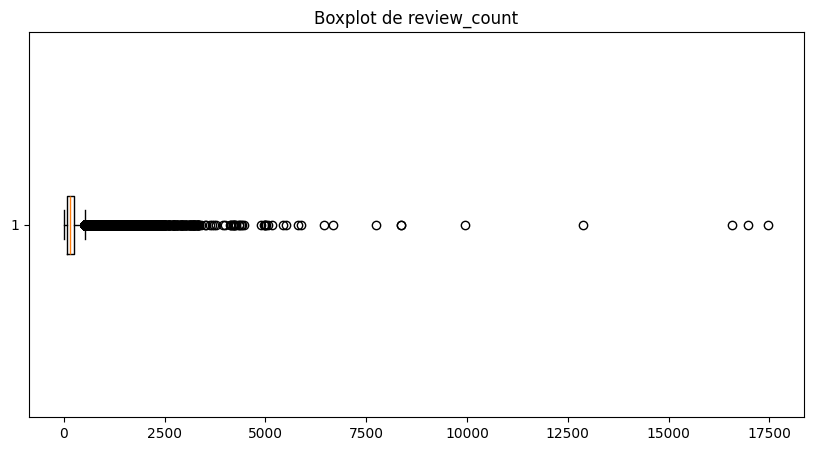

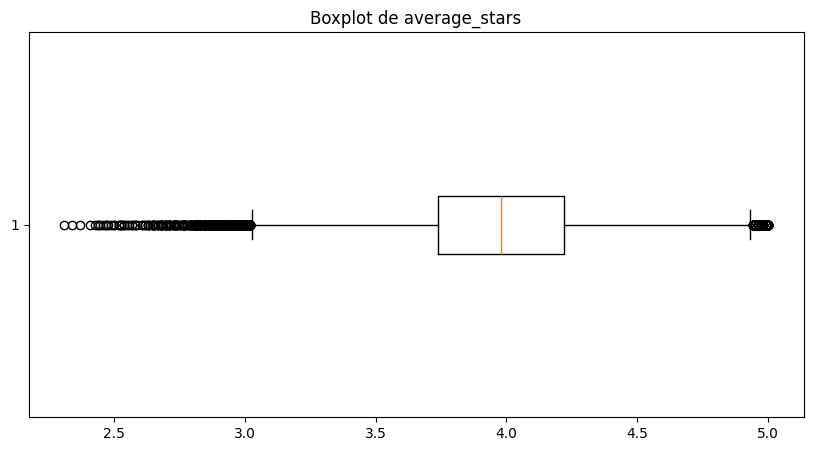

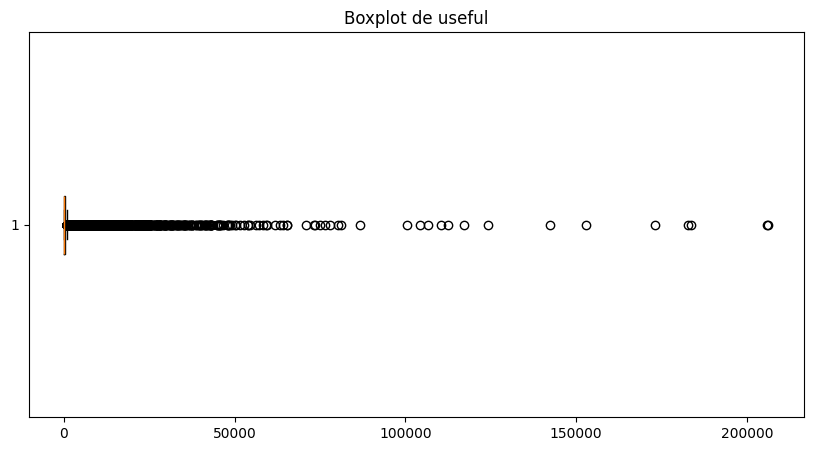

In [30]:
plt.figure(figsize=(10, 5))
plt.boxplot(yelp_user['review_count'], vert=False)
plt.title('Boxplot de review_count')
plt.show()

# Boxplot para 'average_stars'
plt.figure(figsize=(10, 5))
plt.boxplot(yelp_user['average_stars'], vert=False)
plt.title('Boxplot de average_stars')
plt.show()

# Boxplot para 'useful'
plt.figure(figsize=(10, 5))
plt.boxplot(yelp_user['useful'], vert=False)
plt.title('Boxplot de useful')
plt.show()



In [32]:
yelp_user['yelping_since'] = pd.to_datetime(yelp_user['yelping_since'])

# Encontrar la fecha más antigua
fecha_mas_antigua = yelp_user['yelping_since'].min()

# Mostrar el resultado
print(f"La fecha más antigua en 'yelping_since' es: {fecha_mas_antigua}")

La fecha más antigua en 'yelping_since' es: 2004-10-12 08:46:11


In [33]:
# Encontrar el valor mínimo de average_stars
min_stars = yelp_user['average_stars'].min()

# Encontrar el valor máximo de average_stars
max_stars = yelp_user['average_stars'].max()

# Mostrar los resultados
print(f"El valor mínimo de 'average_stars' es: {min_stars}")
print(f"El valor máximo de 'average_stars' es: {max_stars}")

El valor mínimo de 'average_stars' es: 2.31
El valor máximo de 'average_stars' es: 5.0


### CONSIDERACIONES:
- Si bien se observa usuarios con gran numero de review count, es debido a que hay registros de actividad desde el 2004.
- En cuanto al conteo de estrellas el rango de mantiene en el rango normal de 1 a 5.
- El boxplot de reacciones marcadas como useful muestra la variacion mas alta, indicando su subjetividad debido al comportamiento de los usuarios, por lo que se considera descartarla como informacion importante.